In [1]:
%matplotlib inline
# import neuroanalysis.spike as spike
import neuroanalysis.reader as reader
import neuroanalysis.waveform as waveform
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [23]:
csc2 = reader.neurolynx_read_csc("data/TRA1.S1/CSC5.ncs")

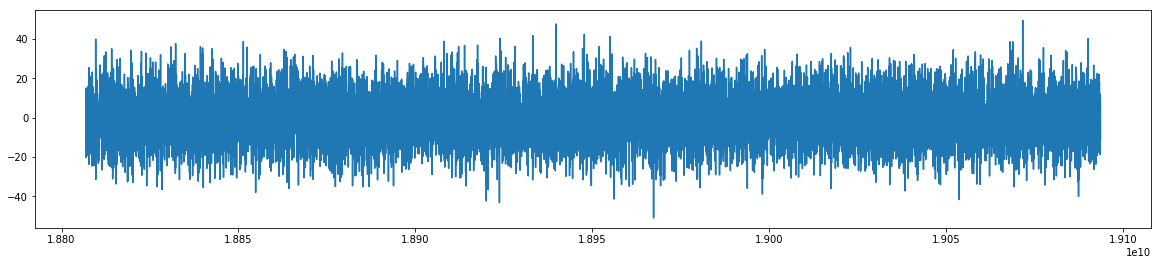

In [24]:
plt.figure(figsize=(20,4))
plt.plot(csc2._time[::800], csc2._csc[::800])
plt.show()

In [25]:
%time y = waveform.bessel_highpass_filter(csc2._csc, 300, 4000, order=4)
thresh = np.std(y)

CPU times: user 228 ms, sys: 84.7 ms, total: 313 ms
Wall time: 314 ms


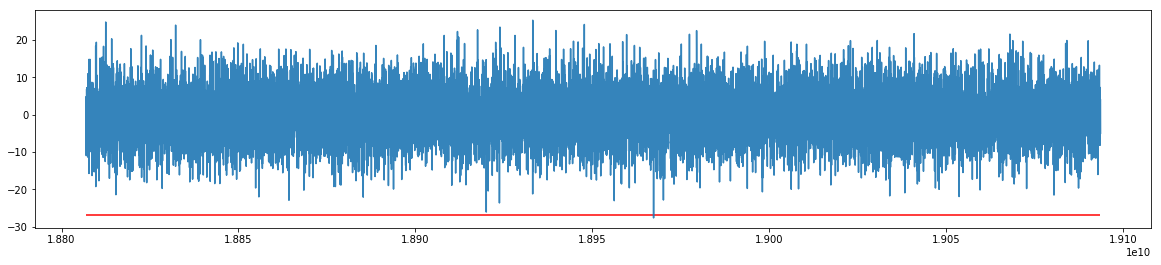

In [31]:
step = 800
plt.figure(figsize=(20,4))
plt.plot(csc2._time[::step], y[::step], alpha=0.9)
plt.hlines(-thresh*4, csc2._time[::step][0],csc2._time[::step][-1], color='r')
# plt.plot(csc2._time[::step], csc2._csc[::step], alpha=0.4)
plt.show()

In [34]:
np.where(y<-thresh*5)[0]

array([ 1033052,  1856600,  3811487,  3932065,  7463918,  7733491,
        8277413,  9955886, 10803995])

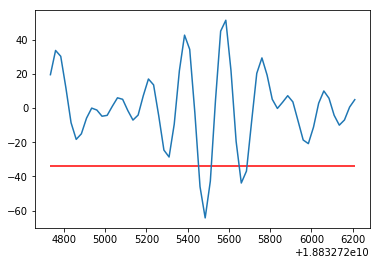

In [47]:
index = 1033052
timer = csc2._time[int(index-30):int(index+30)]
plt.plot(timer, csc2._csc[int(index-30):int(index+30)])
plt.hlines(-thresh*5, timer[0],timer[-1], color='r')
plt.show()